In [101]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [102]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [107]:
house_df = house_df.select_dtypes(exclude=['object'])
house_df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,Po,TA,Fa,Gd,GdWo,MnPrv,MnWw,Othr,Shed,TenC
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,1,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,0,0,0,0


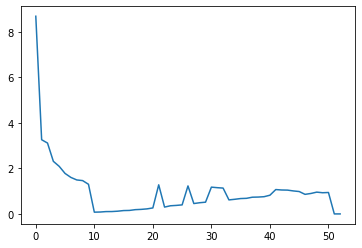

[8.68677332e+00+0.00000000e+00j 3.25972803e+00+0.00000000e+00j
 3.11466303e+00+0.00000000e+00j 2.31111595e+00+0.00000000e+00j
 2.09029767e+00+0.00000000e+00j 1.77871965e+00+0.00000000e+00j
 1.60293974e+00+0.00000000e+00j 1.49314221e+00+0.00000000e+00j
 1.46423690e+00+0.00000000e+00j 1.30260945e+00+0.00000000e+00j
 7.66416463e-02+0.00000000e+00j 8.33458256e-02+0.00000000e+00j
 1.02227519e-01+0.00000000e+00j 1.04213033e-01+0.00000000e+00j
 1.19813710e-01+0.00000000e+00j 1.47211571e-01+0.00000000e+00j
 1.53272299e-01+0.00000000e+00j 1.87070716e-01+0.00000000e+00j
 1.99363029e-01+0.00000000e+00j 2.21183891e-01+0.00000000e+00j
 2.62675873e-01+0.00000000e+00j 1.27834628e+00+0.00000000e+00j
 3.00440709e-01+0.00000000e+00j 3.57647116e-01+0.00000000e+00j
 3.73898900e-01+0.00000000e+00j 3.96634801e-01+0.00000000e+00j
 1.23017487e+00+0.00000000e+00j 4.55546170e-01+0.00000000e+00j
 4.91601655e-01+0.00000000e+00j 5.15666576e-01+0.00000000e+00j
 1.17685077e+00+0.00000000e+00j 1.15306361e+00+0.000000

In [109]:
house_df = house_df.dropna()
X_hdf = StandardScaler().fit_transform(house_df)
Xt = X_hdf.T
Cx = np.cov(Xt)

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.show()
print(eig_val_cov)

In [ ]:
sklearn_pca = PCA(n_components)